import the necessary libraries and modules

In [16]:
import streamlit as st
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,\
    mean_squared_error, mean_absolute_percentage_error
import missingno as msno 
import warnings
import statsmodels
warnings.filterwarnings("ignore")


Data processing

In [17]:
# train=pd.read_csv('train.csv')
# # test=pd.read_csv('test.csv')
# train_x=train.drop('SalePrice',axis=1)
# # train_y=train['SalePrice']
# # train.head(4)
train=pd.read_csv('train.csv')
# test=pd.read_csv('test.csv')
x=train.drop('SalePrice',axis=1)
y=train['SalePrice']
# train.head(4)


Data Cleaning 

In [18]:
train.duplicated().sum()

0

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [20]:
# remove the duplicate entries
# train_x.duplicated().sum()
# test.duplicated().sum()

As a sizable amount of insights depict the information exhibited in the following features is of very little importance. for that matter the features are removed from the dataset.

In [21]:
dropped_cols = ['SaleCondition','MiscVal','MiscFeature','Fence','PoolQC','Id', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 
                'LandSlope', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                'MasVnrType', 'MasVnrArea', 'Foundation', 'Heating','YearBuilt']

x_train=x_train.drop(dropped_cols, axis=1)
x_test=x_test.drop(dropped_cols, axis=1)

In [22]:
#insight about the columns
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 493 to 1335
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1095 non-null   int64  
 1   MSZoning       1095 non-null   object 
 2   LotFrontage    905 non-null    float64
 3   LotArea        1095 non-null   int64  
 4   Utilities      1095 non-null   object 
 5   Neighborhood   1095 non-null   object 
 6   Condition1     1095 non-null   object 
 7   Condition2     1095 non-null   object 
 8   BldgType       1095 non-null   object 
 9   HouseStyle     1095 non-null   object 
 10  OverallQual    1095 non-null   int64  
 11  OverallCond    1095 non-null   int64  
 12  YearRemodAdd   1095 non-null   int64  
 13  ExterQual      1095 non-null   object 
 14  ExterCond      1095 non-null   object 
 15  BsmtQual       1073 non-null   object 
 16  BsmtCond       1073 non-null   object 
 17  BsmtExposure   1073 non-null   object 
 18  BsmtFi

<Axes: >

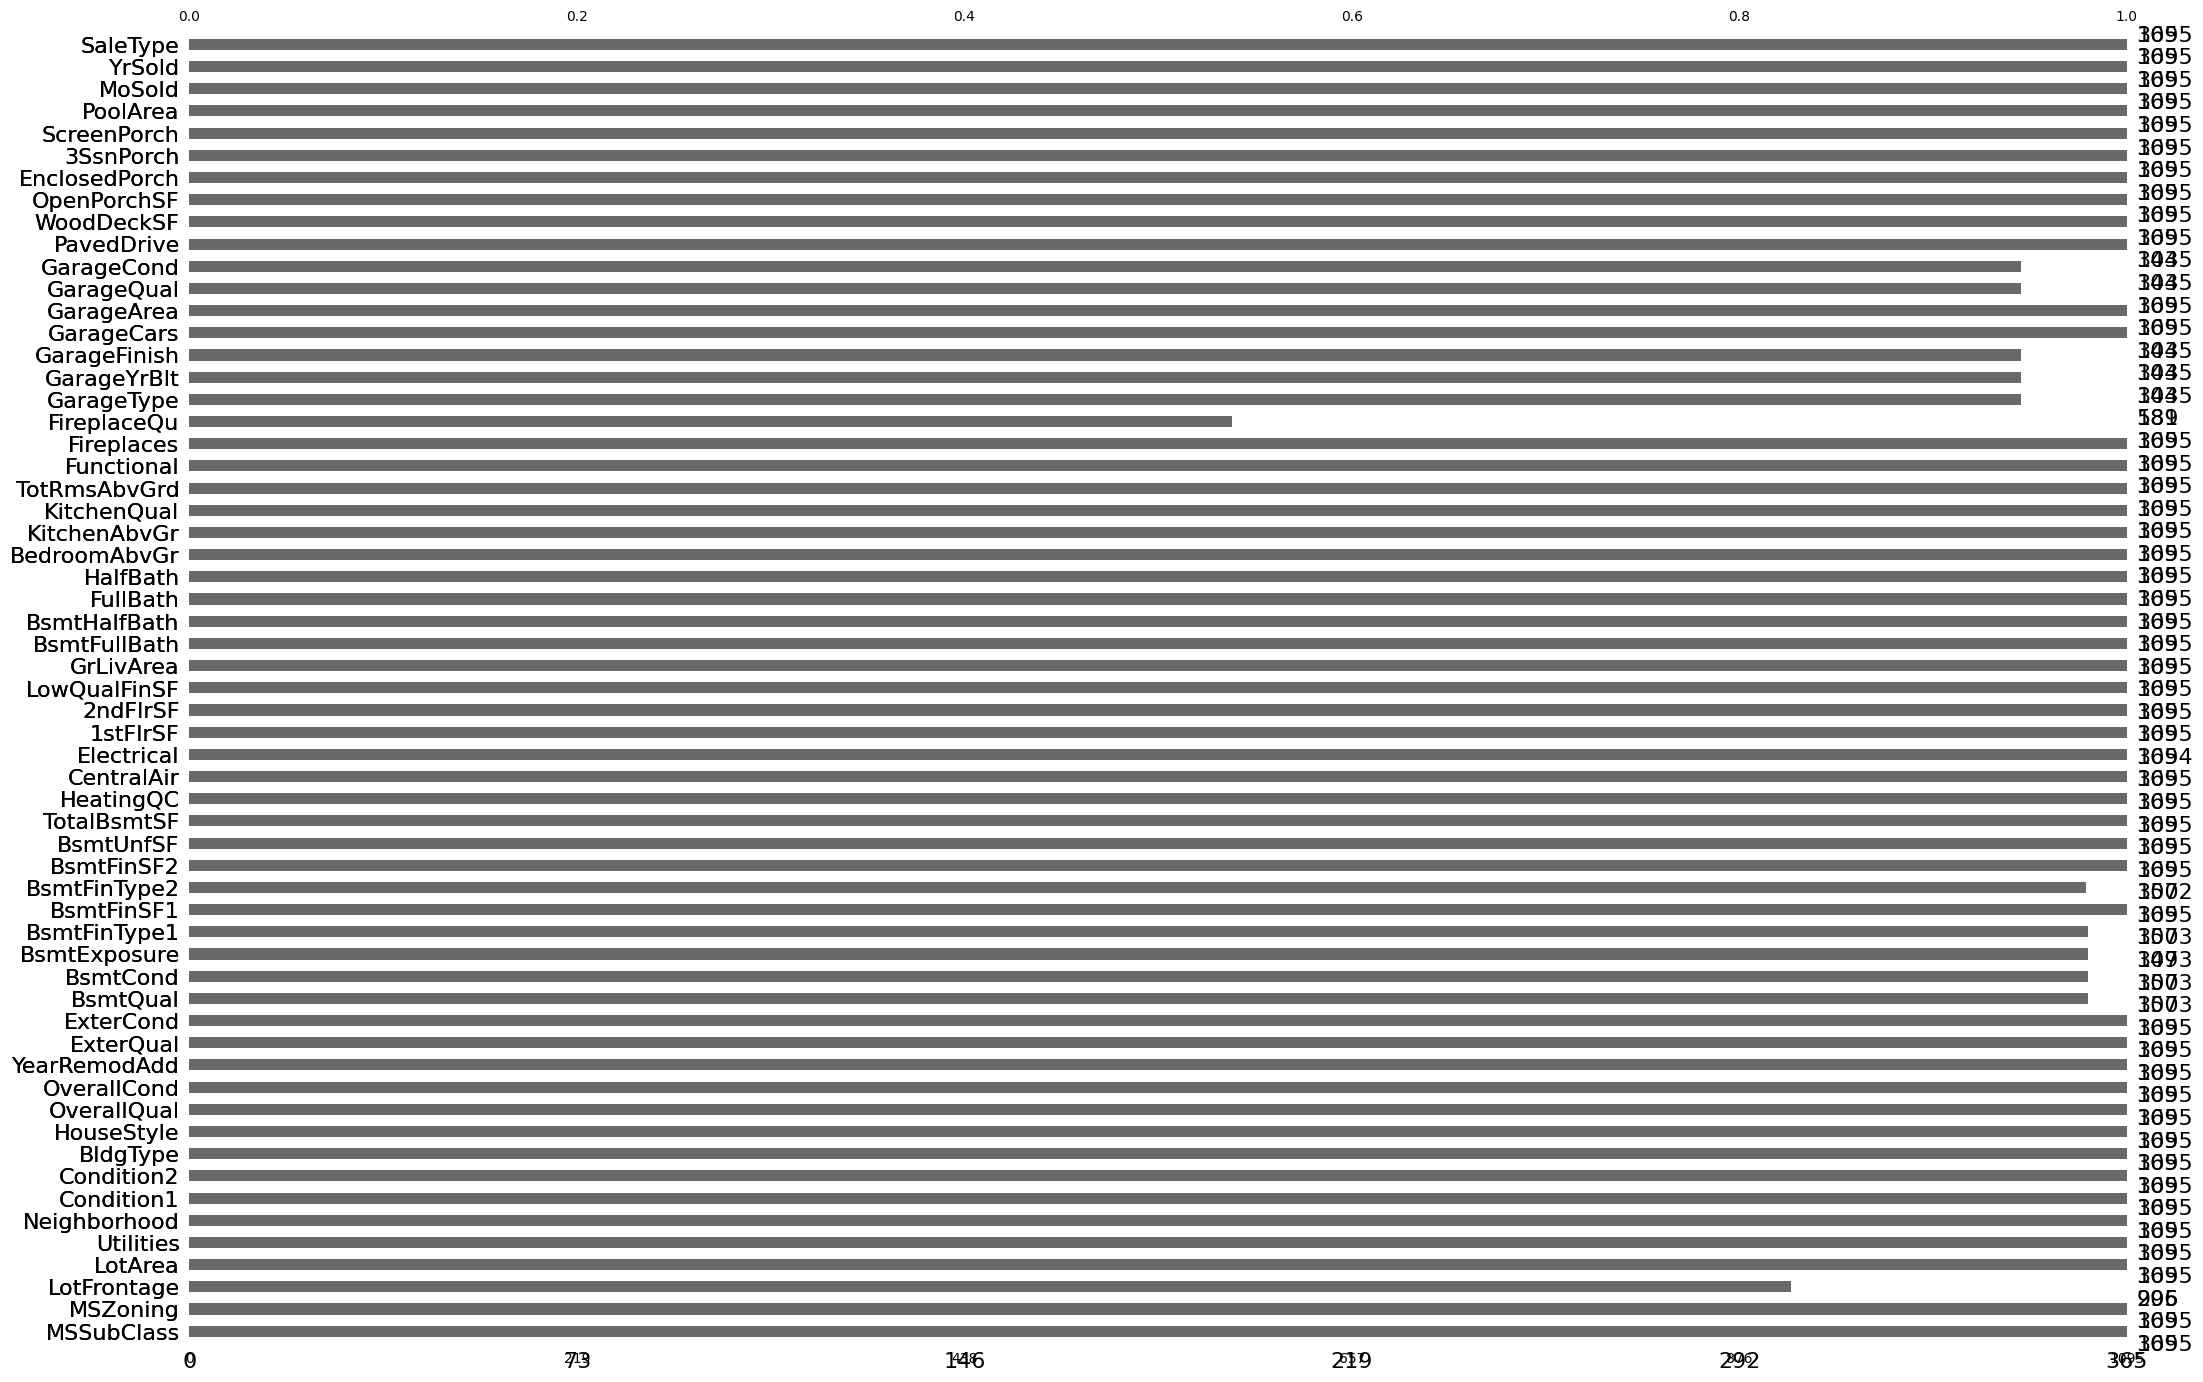

In [23]:
#visualization the distribution of of the features 
msno.bar(x_test)
msno.bar(x_train)

In [24]:
#  finds out the number of of missing values in each features column
missing_x=x_train.isnull().sum()
missing_x = missing_x.sort_values()
missing_x.values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,  22,  22,  22,  22,  23,
        60,  60,  60,  60,  60, 190, 506], dtype=int64)

In [25]:
#removes the features(columns) 75% of whose values are missing

features_included=[]
def missing(data,cutoff_point): #the function accepts the cut-off points points as a cutoff_point argument
    for i in range(len(data)):
        if data.values[i]< cutoff_point:
            features_included.append(data.index[i])
    return features_included
cutoff_point=len(x_train)*0.25 #the cutoff point
features_included= missing(missing_x,cutoff_point)
features_included

['MSSubClass',
 'YrSold',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 '2ndFlrSF',
 'Functional',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'Fireplaces',
 '1stFlrSF',
 'LowQualFinSF',
 'SaleType',
 'BldgType',
 'CentralAir',
 'Condition2',
 'OverallCond',
 'YearRemodAdd',
 'ExterQual',
 'ExterCond',
 'Condition1',
 'Neighborhood',
 'Utilities',
 'LotArea',
 'BsmtFinSF1',
 'MSZoning',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'HouseStyle',
 'OverallQual',
 'Electrical',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageQual',
 'GarageCond',
 'GarageYrBlt',
 'GarageFinish',
 'GarageType',
 'LotFrontage']

In [26]:
# separates the data types of the dataset into numeric and object types
x_train=x_train[features_included]
x_train.columns

x_train=x_train[features_included]
train_x_obj=[]
train_x_int=[]
train_x_float=[]
for i in x_train.columns:
    if x_train[i].dtype=='object':
        train_x_obj.append(i)
    elif x_train[i].dtype=='int64':
        train_x_int.append(i)
    else: #train_x[i].dtype=='float64':
        train_x_float.append(i)
train_x_obj
train_x_int
train_x_float

['GarageYrBlt', 'LotFrontage']

one hot encoding for training data (train_x)

In [27]:
# dummy variables of object datatype of the train_x dataset

dummies=pd.get_dummies(x_train[train_x_obj],drop_first=True)
dummies


,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,PavedDrive_P,PavedDrive_Y,...,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageFinish_RFn,GarageFinish_Unf,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
493,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
860,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
278,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
1152,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
397,0,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0,1,0,0,0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,0
324,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
346,0,0,1,0,0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,0
1191,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


In [28]:
#train_x dataset with dummy variables

x_train=x_train[features_included]
train_x_int_1=x_train[train_x_int]
train_x_float_1=x_train[train_x_float]
train_x_numeric=pd.concat([train_x_int_1 ,train_x_float_1],axis=1)
train_x_numeric.columns
x_train=pd.concat([train_x_numeric,dummies],axis=1)
x_train=x_train.fillna(0)
x_train
y_train


493     155000
860     189950
278     415298
1152    230000
397     169500
         ...  
435     212000
324     242000
346     151500
1191    174000
1335    167900
Name: SalePrice, Length: 1095, dtype: int64

In [29]:
#dummy variables of test dataset object datatype columns

x_test=x_test[features_included]
test_dummies=x_test[train_x_obj]
test_dummies=pd.get_dummies(test_dummies)
test_dummies


,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,...,GarageCond_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
642,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
514,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1137,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1366,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
568,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
1235,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1341,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


Calculation of variance inflation factor to observe the dummy variables trap

In [30]:
import statsmodels.api as sm
train_data=pd.concat([x_train,y_train],axis=1)
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    cols = data.columns
    for i in range(cols.shape[0]):
        y = data[cols[i]]
        x = data[cols.drop([cols[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [cols[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

x=train_data.drop(['SalePrice'],axis=1)
vf=calculate_vif(x_train)
vf



,Var,Vif
10,2ndFlrSF,inf
21,1stFlrSF,inf
26,BsmtFinSF1,inf
27,BsmtFinSF2,inf
28,BsmtUnfSF,inf
...,...,...
16,3SsnPorch,1.14
130,BsmtFinType1_GLQ,0.85
147,GarageFinish_RFn,0.76
109,HeatingQC_TA,0.58


In [31]:
#Separates features with  high and low variance inflation factors

vf=pickle.dumps(vf)
vf=pickle.loads(vf)

vf['Vif'].dtypes
dum_bw5=[]
dum_ob_5=[]
newline='\n'

def Inflated_value_count():
    j=1
    l=1
    for i in range(len(vf)):
        if vf.iloc[i][1]<5:
            dum_bw5.append(vf.iloc[i][0])
            l+=1
        else:
            dum_ob_5.append(vf.iloc[i][0])
            j+=1
   
    print('COUNT OF FEATURES OF LOW vif <5: ',l)
    print('LOW VF FEATURES: ' ,dum_bw5)
    print('COUNT OF FEATURES OF HIGH vif >5: ',j)
    print('HIGH VF FEATURES: ',dum_ob_5)
    # return f"dummy variables vif value >5:newline {newline.join( dum_ob_5 )}, dummy variables vif value <5:newline {newline.join( dum_bw5)}"    
Inflated_value_count()


COUNT OF FEATURES OF LOW vif <5:  84
LOW VF FEATURES:  ['Neighborhood_NoRidge', 'HalfBath', 'BldgType_Duplex', 'Functional_Min2', 'BsmtFullBath', 'Neighborhood_Timber', 'Neighborhood_SWISU', 'Neighborhood_BrDale', 'BsmtFinType2_Rec', 'Neighborhood_ClearCr', 'Functional_Min1', 'Fireplaces', 'GarageQual_Po', 'HouseStyle_SLvl', 'BsmtCond_Gd', 'Condition2_PosA', 'LotArea', 'BsmtFinType2_LwQ', 'Neighborhood_MeadowV', 'ExterQual_Fa', 'Condition1_Feedr', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRNn', 'BsmtFinType2_BLQ', 'HouseStyle_SFoyer', 'KitchenQual_Fa', 'GarageFinish_Unf', 'Condition2_RRAn', 'Neighborhood_StoneBr', 'Functional_Mod', 'BsmtExposure_No', 'HouseStyle_2.5Fin', 'BsmtQual_Fa', 'OpenPorchSF', 'GarageType_CarPort', 'WoodDeckSF', 'HouseStyle_2Story', 'Neighborhood_Veenker', 'BsmtExposure_Gd', 'BsmtFinType1_Rec', 'BsmtFinType2_GLQ', 'Condition1_RRAn', 'BsmtFinType1_BLQ', 'ExterCond_Po', 'BsmtExposure_Mn', 'HeatingQC_Gd', 'BsmtFinType1_LwQ', 'Electrical_FuseP', 'Condition1

In [32]:
#features having low variance inflation factor

low_vif_obj_dummies=set(dummies.columns).difference(set(dum_ob_5))
low_vif_obj_dummies

{'BldgType_Duplex',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtQual_Fa',
 'CentralAir_Y',
 'Condition1_Feedr',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNn',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'ExterCond_Po',
 'ExterQual_Fa',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Typ',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageQual_Po',
 'GarageType_CarPort',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'HeatingQC_TA',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseSty

In [33]:
#saves features of numeric values in pickle file

with open('numeric_dtype_features.pickle', 'wb') as f:
    pickle.dump(train_x_numeric.columns, f)

In [34]:
#prepares train_x dataset
x_train=pd.concat([train_x_numeric,dummies[low_vif_obj_dummies]],axis=1)
x_train=x_train.fillna(0)
# train_x.columns
# msno.bar(train_x)
x_train.shape

(1095, 105)

In [35]:
#train dataset with a target feature
train_data_set=pd.concat([x_train,y_train],axis=1)
with open('train_dataset.pickle', 'wb') as f:
    pickle.dump(train_data_set,f)
# train_data_set['SalePrice']

In [36]:
#prepares test dataset

x_test=x_test[features_included]
test_dummies=x_test[train_x_obj]
test_dummies=pd.get_dummies(test_dummies)
# test_dummies
# test_int=test[train_x_int]
# test_float=test[train_x_float]
test_numeric=x_test[train_x_numeric.columns]
x_test=pd.concat([test_numeric, test_dummies],axis=1)
x_test=x_test.fillna(0)
x_test.columns


Index(['MSSubClass', 'YrSold', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       ...
       'GarageCond_TA', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd'],
      dtype='object', length=172)

In [37]:
#segregate object datatype features that are not common to both test and train datasets

set_diff_1=set(x_train.columns).difference(set(x_test.columns))
set_diff_1

{'Condition1_RRNn',
 'Condition2_PosA',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Electrical_FuseP',
 'ExterCond_Po',
 'HeatingQC_Po',
 'Neighborhood_Blueste',
 'Utilities_NoSeWa'}

In [38]:
#saves object datatype features in pickle format

object_f=low_vif_obj_dummies.difference(set_diff_1)
object_features=list(object_f)

with open("object_dtype_features.pickle", "wb") as f:
    pickle.dump(object_features, f)


In [39]:
#removes features which are not the  train dataset to avoid data mismatch during training

x_train=x_train.drop(list(set_diff_1),axis=1)
x_train.shape

(1095, 96)

<Axes: >

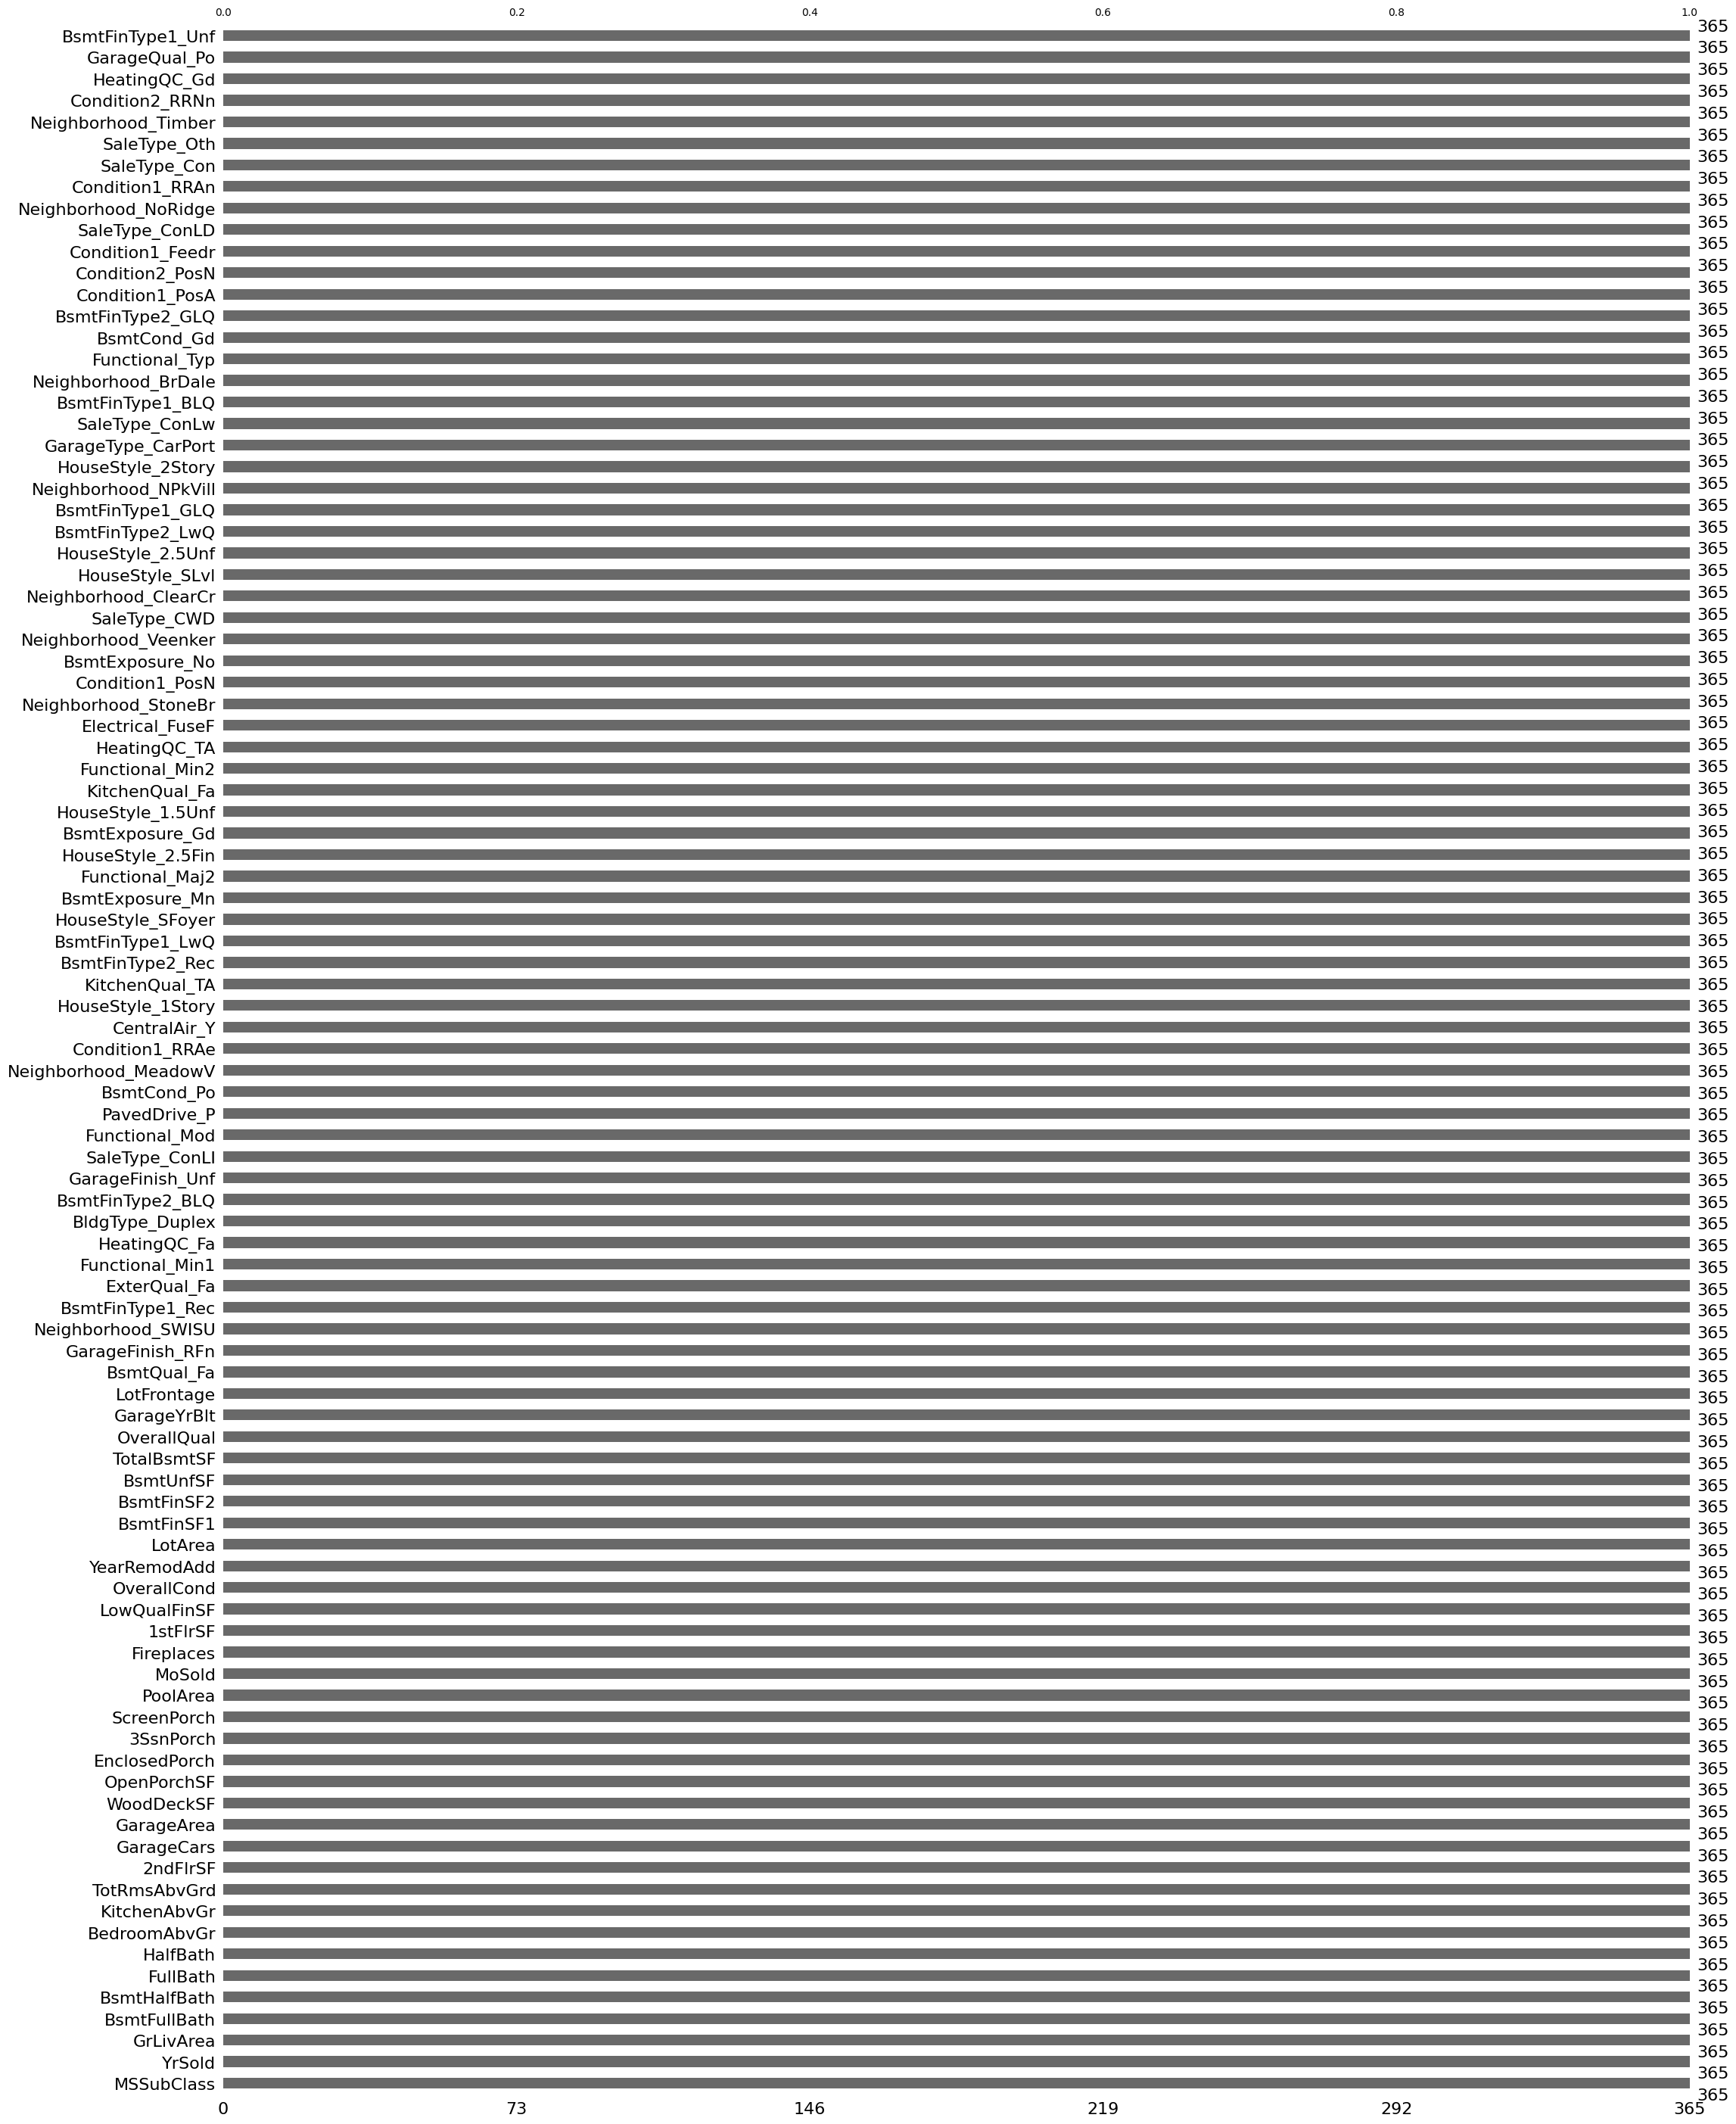

In [40]:
x_test=x_test[x_train.columns]
test_1=x_test.fillna(0)
msno.bar(x_test)


In [41]:
# px.box(train_data)

Dataset normalization

This process important fro the data set has various magnitude such as year, months,area ...

For this case mini-max  scaling  is use for the outcomes are positive numeric values

In [42]:
#segregates features  with higher and lower values

def category(df):
    col_higher_magnitude=[]
    col_lower_magnitude=[]
    col=df.columns
    for i in col:
        if any(df[i]>10):
            col_higher_magnitude.append(i)
        else:
            col_lower_magnitude.append(i)
    return (col_higher_magnitude, col_lower_magnitude)

values=category(x_train)
col_higher_magnitude ,col_lower_magnitude =  values
print(len(col_higher_magnitude))
print(len(col_lower_magnitude))
print('col_higher_magnitude: ', col_higher_magnitude )
print('col_lower_magnitude:  ', col_lower_magnitude)

23
73
col_higher_magnitude:  ['MSSubClass', 'YrSold', 'GrLivArea', 'TotRmsAbvGrd', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold', '1stFlrSF', 'LowQualFinSF', 'YearRemodAdd', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageYrBlt', 'LotFrontage']
col_lower_magnitude:   ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'Fireplaces', 'OverallCond', 'OverallQual', 'BsmtQual_Fa', 'GarageFinish_RFn', 'Neighborhood_SWISU', 'BsmtFinType1_Rec', 'ExterQual_Fa', 'Functional_Min1', 'HeatingQC_Fa', 'BldgType_Duplex', 'BsmtFinType2_BLQ', 'GarageFinish_Unf', 'SaleType_ConLI', 'Functional_Mod', 'PavedDrive_P', 'BsmtCond_Po', 'Neighborhood_MeadowV', 'Condition1_RRAe', 'CentralAir_Y', 'HouseStyle_1Story', 'KitchenQual_TA', 'BsmtFinType2_Rec', 'BsmtFinType1_LwQ', 'HouseStyle_SFoyer', 'BsmtExposure_Mn', 'Functional_Maj2', 'HouseStyle_2.5Fin', 'BsmtExposur

MIN-MAX Scalar model

In [43]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(x_train[col_higher_magnitude])
x_after_min_max_scaler 
df=pd.DataFrame(x_after_min_max_scaler,columns=col_higher_magnitude)
df

,MSSubClass,YrSold,GrLivArea,TotRmsAbvGrd,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,1stFlrSF,LowQualFinSF,YearRemodAdd,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GarageYrBlt,LotFrontage
0,0.000000,0.50,0.159685,0.272727,0.000000,0.217207,0.000000,0.000000,0.000000,0.0,...,0.207639,0.0,0.166667,0.030994,0.066265,0.472050,0.155394,0.207692,0.977114,0.223642
1,0.176471,0.25,0.189854,0.363636,0.248910,0.152327,0.000000,0.478088,0.000000,0.0,...,0.125000,0.0,0.800000,0.029643,0.000000,0.000000,0.390411,0.149264,0.957711,0.175719
2,0.000000,0.25,0.323405,0.454545,0.000000,0.516220,0.144691,0.195219,0.000000,0.0,...,0.404861,0.0,0.950000,0.061464,0.000000,0.000000,0.907962,0.347136,0.998507,0.341853
3,0.000000,0.00,0.263836,0.272727,0.000000,0.331453,0.000000,0.000000,0.507246,0.0,...,0.333102,0.0,0.900000,0.059899,0.052445,0.485359,0.098459,0.175614,0.973134,0.287540
4,0.235294,0.25,0.264028,0.454545,0.453269,0.186178,0.000000,0.334661,0.000000,0.0,...,0.116667,0.0,0.200000,0.029400,0.095677,0.000000,0.138699,0.141408,0.976119,0.220447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.235294,0.75,0.235012,0.272727,0.403874,0.387870,0.184364,0.121514,0.000000,0.0,...,0.105324,0.0,0.766667,0.043782,0.068214,0.305235,0.029966,0.130769,0.993035,0.137380
1091,0.352941,1.00,0.488086,0.727273,0.523002,0.397743,0.280047,0.000000,0.000000,0.0,...,0.353241,0.0,0.950000,0.046624,0.000000,0.000000,0.303938,0.116203,0.975622,0.306709
1092,0.000000,0.25,0.099923,0.181818,0.000000,0.212271,0.000000,0.000000,0.000000,0.0,...,0.135648,0.0,0.800000,0.053621,0.088235,0.000000,0.196918,0.156792,0.975124,0.000000
1093,0.823529,0.25,0.192736,0.181818,0.327845,0.346968,0.240373,0.000000,0.000000,0.0,...,0.090741,0.0,0.833333,0.006287,0.000000,0.000000,0.332192,0.127005,0.994527,0.076677


In [44]:
#training dataset final preparation step

train_x_dropped=x_train.drop(col_higher_magnitude,axis=1)
train_x_dropped.shape
# x_train.shape
# x_train=pd.concat([train_x_dropped,df],axis=1)
# x_train.columns
# x_train=x_train.fillna(0) # Final processed training dataset
# x_train.shape


(1095, 73)

In [45]:
#saves the train data columns in pickle format

with open('train_data_features_col.pickle', 'wb') as f:
    pickle.dump(x_train.columns, f)

Repeat the same procedure for test dataset

In [46]:
x_test# Testing dataset
value_test=category(x_test)
coln_higher_magnitude,coln_lower_magnitude=value_test #unpacks tuple of values
coln_higher_magnitude
coln_lower_magnitude

['BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageCars',
 'Fireplaces',
 'OverallCond',
 'OverallQual',
 'BsmtQual_Fa',
 'GarageFinish_RFn',
 'Neighborhood_SWISU',
 'BsmtFinType1_Rec',
 'ExterQual_Fa',
 'Functional_Min1',
 'HeatingQC_Fa',
 'BldgType_Duplex',
 'BsmtFinType2_BLQ',
 'GarageFinish_Unf',
 'SaleType_ConLI',
 'Functional_Mod',
 'PavedDrive_P',
 'BsmtCond_Po',
 'Neighborhood_MeadowV',
 'Condition1_RRAe',
 'CentralAir_Y',
 'HouseStyle_1Story',
 'KitchenQual_TA',
 'BsmtFinType2_Rec',
 'BsmtFinType1_LwQ',
 'HouseStyle_SFoyer',
 'BsmtExposure_Mn',
 'Functional_Maj2',
 'HouseStyle_2.5Fin',
 'BsmtExposure_Gd',
 'HouseStyle_1.5Unf',
 'KitchenQual_Fa',
 'Functional_Min2',
 'HeatingQC_TA',
 'Electrical_FuseF',
 'Neighborhood_StoneBr',
 'Condition1_PosN',
 'BsmtExposure_No',
 'Neighborhood_Veenker',
 'SaleType_CWD',
 'Neighborhood_ClearCr',
 'HouseStyle_SLvl',
 'HouseStyle_2.5Unf',
 'BsmtFinType2_LwQ',
 'BsmtFinType1_GLQ',
 'Neighborho

In [47]:
min_max_scaler_test = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler_test.fit_transform(x_test[coln_higher_magnitude])
x_after_min_max_scaler 
df_test=pd.DataFrame(x_after_min_max_scaler,columns=col_higher_magnitude)
df_test

,MSSubClass,YrSold,GrLivArea,TotRmsAbvGrd,2ndFlrSF,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,1stFlrSF,LowQualFinSF,YearRemodAdd,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GarageYrBlt,LotFrontage
0,0.352941,0.75,0.750237,0.7,0.387239,0.396755,0.402695,0.202925,0.000000,0.0,...,0.724663,0.0,0.762712,0.078324,0.740546,0.000000,0.251742,0.741360,0.981583,0.412088
1,0.147059,0.25,0.144033,0.3,0.000000,0.147493,0.000000,0.000000,0.339394,0.0,...,0.197912,0.0,0.000000,0.057584,0.000000,0.000000,0.356712,0.291682,0.958686,0.302198
2,0.176471,1.00,0.217157,0.4,0.132013,0.000000,0.000000,0.000000,0.533333,0.0,...,0.193997,0.0,0.779661,0.030583,0.000000,0.000000,0.362285,0.296240,0.000000,0.296703
3,0.000000,1.00,0.295663,0.5,0.000000,0.179941,0.000000,0.179159,0.000000,0.0,...,0.406264,0.0,0.067797,0.039841,0.283613,0.000000,0.338133,0.481580,0.972623,0.428571
4,0.235294,0.50,0.460905,0.5,0.499450,0.433628,0.000000,0.160878,0.000000,0.0,...,0.238365,0.0,0.830508,0.048598,0.332458,0.000000,0.111472,0.331561,0.995022,0.373626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.000000,0.50,0.277619,0.3,0.000000,0.237463,0.000000,0.115174,0.000000,0.0,...,0.381470,0.0,0.305085,0.042699,0.131303,0.333786,0.097538,0.361565,0.979592,0.302198
361,0.176471,0.75,0.569167,0.3,0.349835,0.451327,0.522455,0.073126,0.000000,0.0,...,0.505437,0.0,1.000000,0.068589,0.756828,0.000000,0.025546,0.568173,0.987058,0.434066
362,0.294118,0.00,0.459006,0.7,0.490649,0.132743,0.303892,0.073126,0.000000,0.0,...,0.242714,0.0,0.000000,0.073701,0.000000,0.000000,0.346958,0.283707,0.952713,0.527473
363,0.000000,0.50,0.246914,0.4,0.000000,0.424779,0.000000,0.142596,0.000000,0.0,...,0.339278,0.0,0.915254,0.077276,0.427521,0.000000,0.139340,0.423092,0.997511,0.362637


In [48]:
# test_dropped=test.drop(coln_higher_magnitude,axis=1)
test_dropped=x_test[coln_lower_magnitude].values
df_np=pd.DataFrame(test_dropped,columns=coln_lower_magnitude)# used to correct the index error
x_test=pd.concat([df_test,df_np],axis=1)
x_test=x_test[x_train.columns] #train_x.columns are used her to have the test dataset similar columns order with the training dataset
x_test

,MSSubClass,YrSold,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,...,SaleType_ConLD,Neighborhood_NoRidge,Condition1_RRAn,SaleType_Con,SaleType_Oth,Neighborhood_Timber,Condition2_RRNn,HeatingQC_Gd,GarageQual_Po,BsmtFinType1_Unf
0,0.352941,0.75,0.750237,1,0,2,1,4,1,0.7,...,0,0,0,0,0,0,0,1,0,0
1,0.147059,0.25,0.144033,0,0,1,0,2,1,0.3,...,0,0,0,0,0,0,0,0,1,1
2,0.176471,1.00,0.217157,0,0,1,0,2,1,0.4,...,0,0,0,0,0,0,0,1,0,1
3,0.000000,1.00,0.295663,0,0,1,0,2,1,0.5,...,0,0,0,0,0,0,0,1,0,0
4,0.235294,0.50,0.460905,1,0,2,1,3,1,0.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.000000,0.50,0.277619,0,0,1,0,3,1,0.3,...,0,0,0,0,0,0,0,0,0,0
361,0.176471,0.75,0.569167,1,0,1,1,1,1,0.3,...,0,0,0,0,0,0,0,0,0,0
362,0.294118,0.00,0.459006,0,0,1,1,4,1,0.7,...,0,0,0,0,0,0,0,1,0,1
363,0.000000,0.50,0.246914,1,0,1,0,3,1,0.4,...,0,0,0,0,0,0,0,0,0,0


Model evaluation and selection using mean squared error criterion

1. linear regression model

In [49]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred = linear_reg.predict(x_test)
LR_error = error=np.mean(np.abs((y_test - y_pred) / y_test)) * 100
LR_error 


22.20572539807857

2. DecisionTree model

In [51]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [52]:
y_pred = dec_tree_reg.predict(x_test)
dec_tree_reg_error = error=np.mean(np.abs((y_test - y_pred) / y_test)) * 100
dec_tree_reg_error

33.93549053440045

3. RandomForest  Model

In [53]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

In [54]:
random_forest_reg_error = error=np.mean(np.abs((y_test - y_pred) / y_test)) * 100
random_forest_reg_error

33.93549053440045

4. GridSearch

In [55]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [56]:
# regressor = gs.best_estimator_

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
GridSearchCV_error = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
GridSearchCV_error

33.93549053440045

5. GradientBoostingRegressor

In [57]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor(random_state=0)
model_GBR.fit(x_train, y_train)


GradientBoostingRegressor(random_state=0)

In [58]:
#saves the model in pickle format
with open("GradientBoostingRegressor.pickle", "wb") as f:
    pickle.dump(model_GBR, f)

In [59]:
pred=model_GBR.predict(x_test)
error=np.sqrt(mean_squared_error(y_test,pred))
mean_absolute_percentage_error
error=np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# error=mean_absolute_error(y_true=y_test,y_pred=y_pred,squared=False)
error

33.93549053440045

Based on mean squared error criterion the relatively the best model is GradientBoostingRegression model